In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
phishing = pd.read_csv('dataset/phishing.csv').dropna() * 1
phishing = phishing.astype({'Encoding':'string','HTML content':'int'})
clean = pd.read_csv('dataset/clean.csv').dropna() * 1
clean = clean.astype({'Encoding':'string','HTML content':'int'})
df =  pd.concat([phishing,clean])

In [4]:
i = 0
for col in df.columns:
    print(i,col)
    i+=1

df.describe().T

0 Unnamed: 0
1 @ in URLs
2 Attachments
3 BanWords
4 Css
5 Encoding
6 External Resources
7 Flash content
8 HTML content
9 Html Form
10 Html iFrame
11 IPs in URLs
12 Javascript
13 Phishy
14 URLs


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6801.0,1898.028378,1259.928668,0.0,854.0,1704.0,2853.0,4553.0
@ in URLs,6801.0,0.001029,0.032068,0.0,0.0,0.0,0.0,1.0
Attachments,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
BanWords,6801.0,15.660932,17.133825,0.0,3.0,10.0,22.0,143.0
Css,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
External Resources,6801.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Flash content,6801.0,0.001176,0.034280,0.0,0.0,0.0,0.0,1.0
HTML content,6801.0,0.731069,0.443437,0.0,0.0,1.0,1.0,1.0
Html Form,6801.0,0.021762,0.145915,0.0,0.0,0.0,0.0,1.0
Html iFrame,6801.0,0.001617,0.040187,0.0,0.0,0.0,0.0,1.0


In [5]:
df = df.drop(df.columns[[0,2,4,6,5,12]], axis = 1)
ph = df.pop('Phishy')
df['Phishy'] = ph
print(df)

      @ in URLs  BanWords  Flash content  HTML content  Html Form  \
0             0        22              0             1          0   
1             0        13              0             1          0   
2             0        27              0             1          0   
3             0        79              0             1          0   
4             0         5              0             1          0   
...         ...       ...            ...           ...        ...   
2251          0         0              0             0          0   
2252          0         0              0             0          0   
2253          0         0              0             0          0   
2254          0         2              0             0          0   
2255          0         9              0             0          0   

      Html iFrame  IPs in URLs  URLs  Phishy  
0               0            0     2       1  
1               0            1     7       1  
2               0            1

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
(x_train,x_test, y_train,y_test) = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [36]:
from imblearn.over_sampling import ADASYN
print('Original data shape,', x_train.shape)
ada = ADASYN()
x_train, y_train = ada.fit_resample(x_train,y_train)
print('Resampled data shape,', x_train.shape)

Original data shape, (5100, 8)
Resampled data shape, (6867, 8)


In [37]:
np.sum(y_train)

3410

In [38]:
def cf_mat(model,lb):
    from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
    import seaborn as snf
    labels = ['not phishing','phishing']
    plt.figure(figsize=(11,11))
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    snf.heatmap(confusion_matrix(y_test,y_pred), square = True, annot=True,fmt='d',xticklabels=labels,yticklabels=labels)
    plt.ylabel("True value")
    plt.xlabel("Predicted value")
    plt.title(lb)
    plt.show()
    print("Accuracy of the model on",lb,"is: ","{:.2f}".format(accuracy_score(y_test, y_pred) * 100),'%')
    print("F1 score of the model on",lb,"is: ","{:.2f}".format(f1_score(y_test, y_pred) * 100),'%')

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC

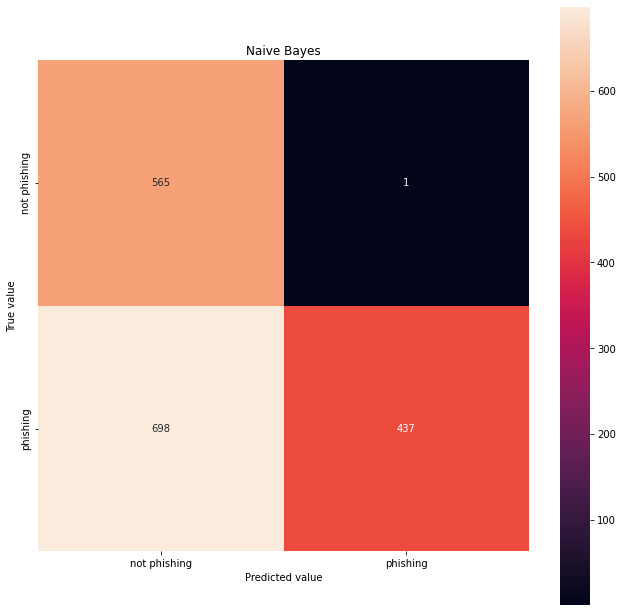

Accuracy of the model on Naive Bayes is:  58.91 %
F1 score of the model on Naive Bayes is:  55.56 %


In [40]:
nb_classifier = GaussianNB()
cf_mat(nb_classifier,"Naive Bayes")

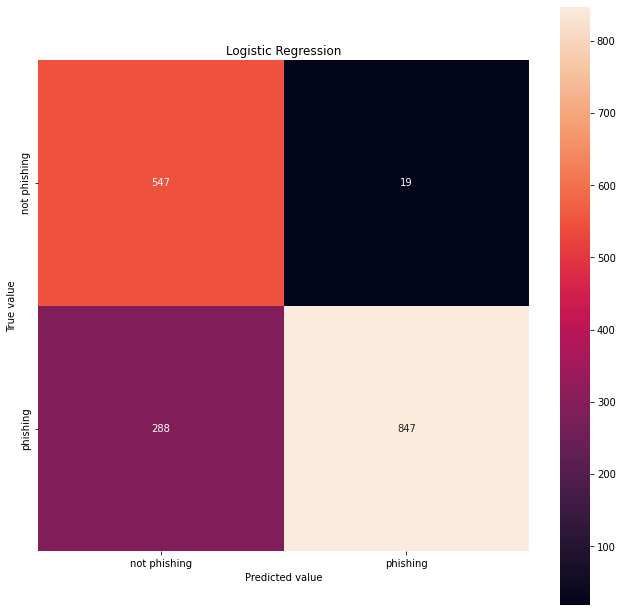

Accuracy of the model on Logistic Regression is:  81.95 %
F1 score of the model on Logistic Regression is:  84.66 %


In [41]:
lr_classifier = LogisticRegression()
cf_mat(lr_classifier,"Logistic Regression")

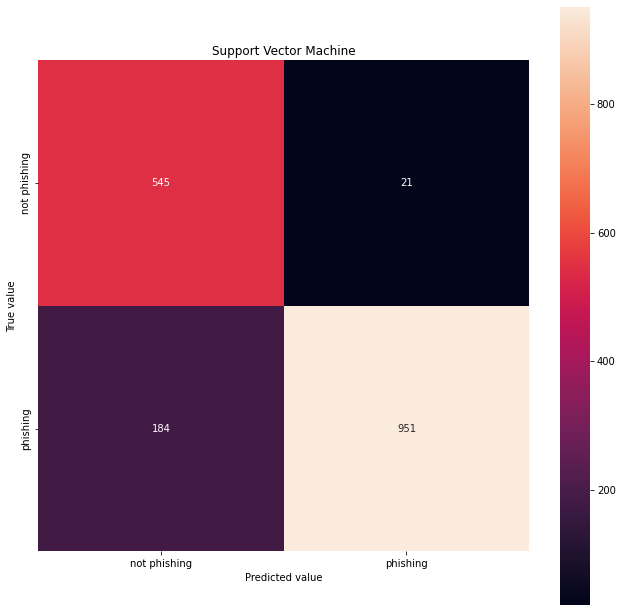

Accuracy of the model on Support Vector Machine is:  87.95 %
F1 score of the model on Support Vector Machine is:  90.27 %


In [42]:
ker_classifier = SVC(kernel='rbf', random_state=0)
cf_mat(ker_classifier,"Support Vector Machine")

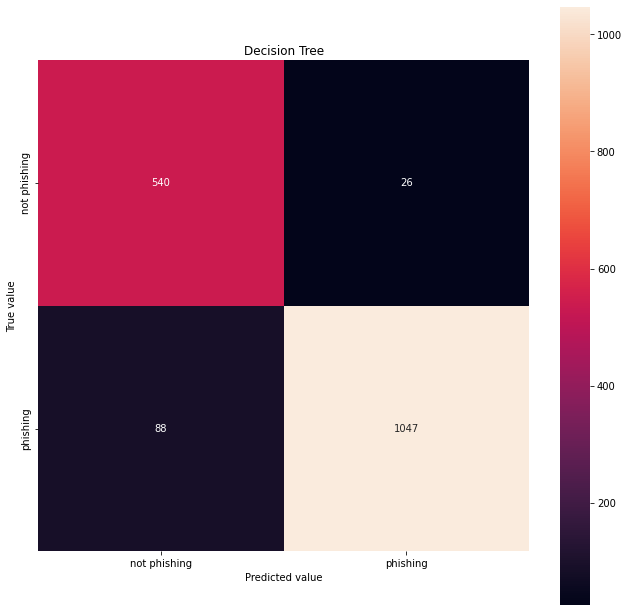

Accuracy of the model on Decision Tree is:  93.30 %
F1 score of the model on Decision Tree is:  94.84 %


In [43]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
cf_mat(dt_classifier,"Decision Tree")

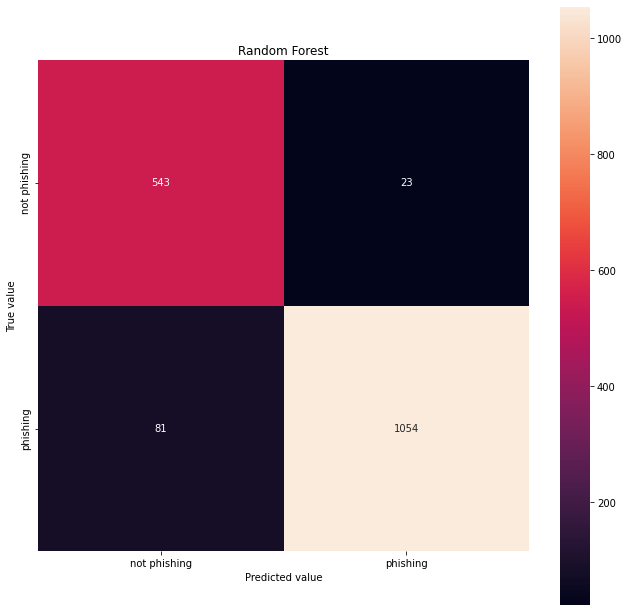

Accuracy of the model on Random Forest is:  93.89 %
F1 score of the model on Random Forest is:  95.30 %


In [61]:
rf_classifier = RandomForestClassifier(random_state=0, criterion='gini', n_estimators=100)
cf_mat(rf_classifier,"Random Forest")